# Quantum Kernel Methods

<em> Copyright (c) 2021 Institute for Quantum Computing, Baidu Inc. All Rights Reserved. </em>

## Introduction

One of the most important learning models for quantum machine learning applications in the noisy intermediate-scale quantum (NISQ) era is the parameterized quantum circuit. Although given its obvious analogy to classical neural networks, many refer to such quantum models as "quantum neural networks", it was shown that the mathematical form of such quantum machine learning models is actually much closer to kernel methods, a different kind of classical learning approach [1]. By combining classical kernel methods and the power of quantum models, quantum kernel methods can shed new light on how to approach a variety of machine learning problems, thus raising great interest in the field of quantum machine learning [2-7]. In this tutorial, we will introduce the basic ideas of quantum kernel methods and demonstrate how to classify data with two different quantum kernels.

### Background

In classical machine learning, kernel methods' basic idea is to map a low-dimensional data vector into a potentially high-dimensional feature space via a feature map, thus giving us the possibility to use linear methods to analyze non-linear features in the original data. As shown in Fig. 1, by mapping linearly inseparable 1D data into a 2D feature space, the feature vectors of the original data become linearly separable.

![feature map](./figures/Qkernel-fig-featuremap.png "Figure 1. feature map in kernel methods")
<div style="text-align:center">Figure 1. feature map in kernel methods </div>

In practice, the feature space's dimensionality sometimes can be extremely large (even goes to infinity). So we do not wish to tackle these feature vectors directly. Another key idea in kernel methods is that we can implicitly analyze these feature vectors by only accessing their inner products in the feature space, which is noted as kernel functions $K(,)$:

$$
K(\mathbf{x}_i, \mathbf{x}_j) = \phi(\mathbf{x}_j)^T \phi(\mathbf{x}_i),
\tag{1}
$$

with $\phi()$ being the feature map. We note that in kernel methods, we do not need to express the feature map explicitly. Instead, we only need to compute the kernel function. This approach can introduce non-linearity into our models, giving us the ability to recognize intractable patterns in the original data space.   

The arguably most famous application of kernel methods is the support vector machine (SVM), which solves linear classification problems. Take a 2-classification problem as an example: Given data set $T = \{ (\mathbf{x}_1, y_1), ..., (\mathbf{x}_m, y_m) \} \subset \mathcal{X}\times\mathbb{Z}_2$, with a hyperplane $( \mathbf{w}, b)$, a support vector machine can assign labels via the signs of the decision function, as:

$$
y_{\rm pred} = {\rm sign}(\langle \mathbf{w}, \mathbf{x} \rangle + b).
\tag{2}
$$

But for linearly inseparable data, such linear classification schemes do not work. So again, as shown in Fig. 1, we can potentially find a better separation by mapping them into a feature space. For example, if we note the separating hyperplane in the feature space as $(\mathbf{w}', b')$, then the decision function becomes:

$$
y_{\rm pred} = {\rm sign}(\langle \mathbf{w}', \phi(\mathbf{x}) \rangle + b').
\tag{3}
$$

Furthermore, by duality, we can write the hyperplane as $\mathbf{w}' = \sum_i \alpha_i \phi(\mathbf{x_i})$ with Lagrangian multipliers $\alpha_i$ [8]. Then, under the constraints $\alpha_i \geq 0$ and $\sum_i y_i \alpha_i=0$, we can compute the optimal $\alpha_i^*$, thus the optimal hyperplane by maximizing 

$$
\sum_i \alpha_i - \frac{1}{2} \sum_{i, j} \alpha_i \alpha_j y_i y_j \phi(\mathbf{x}_j)^T \phi(\mathbf{x}_i).
\tag{4}
$$

Notice that in Eq. (4), we only need the inner products of feature vectors $\phi(\mathbf{x}_j)^T \phi(\mathbf{x}_i) = K(x_i, x_j)$, which is the above mentioned kernel function. As a result, we are able to find the optimal separating hyperplane in the feature space with SVM by only accessing the feature space through the kernel function. Furthermore, we can compute the predicted label as follows:

$$
y_{\rm pred} = {\rm sign}(\sum_i \alpha^*_i  \langle \phi(\mathbf{x_i}), \phi(\mathbf{x}' \rangle + b') = 
{\rm sign}(\sum_i \alpha^*_i  K(\mathbf{x}_i, \mathbf{x}') + b').
\tag{5}
$$

Again, only kernel function is needed. 

Given the idea of classical kernel methods, we can easily understand the essential idea of quantum kernel methods. First, consider a quantum feature space, where we map a classical data vector $\mathbf{x}$ into a quantum state $| \phi(\mathbf{x})\rangle$ by a encoding circuit $U(\mathbf{x})$ as follows:

$$
U(\mathbf{x}) | 0^{\otimes N} \rangle = | \phi(\mathbf{x}) \rangle.
\tag{6}
$$

There are many discussions about how to best design an encoding circuit. We refer to our [data encoding tutorial](./DataEncoding_EN.ipynb) for a more detailed explanation. The encoding can also be regarded as a quantum feature map from classical data space to the Hilbert space. Based on this idea, we define a quantum kernel function as the inner products of two quantum feature vectors in the Hilbert space, which is

$$
K^Q_{ij} = |\langle \phi(\mathbf{x}_j) | \phi(\mathbf{x}_i) \rangle |^2,
\tag{7}
$$

which can be further formulated as

$$
|\langle \phi(\mathbf{x}_j) | \phi(\mathbf{x}_i) \rangle |^2 =  |\langle 0^{\otimes N} | U^\dagger(\mathbf{x}_j) U(\mathbf{x}_i) | 0^{\otimes N} \rangle |^2.
\tag{8}
$$

By running the quantum circuit as shown in Fig. 2, and measure the probability of observing $| 0^{\otimes N} \rangle $ at the output, we can estimate the quantum kernel function in Eq. (8). This way of constructing quantum kernels is also known as quantum kernel estimation (QKE). By replacing the classical kernel function in Eq. (4-5) with QKE, we can classify data in the quantum feature space with SVM. Given the potentially non-simulatable nature of such quantum kernels, there might exist a quantum advantage in recognizing classically intractable patterns. Such an advantage has been rigorously shown, with a constructed classically hard classification problem and a carefully designed quantum feature map [3].

![QKE](./figures/Qkernel-fig-QKE.png "Figure 2. Quantum kernel estimation circuit")
<div style="text-align:center">Figure 2. Quantum kernel estimation circuit </div>

![illustration](./figures/Qkernel-fig-illustrationEN.png "Figure 3. Classical kernel methods and quantum kernel methods")
<div style="text-align:center">Figure 3. Classical kernel methods and quantum kernel methods </div>

### Connections between quantum machine learning and kernel methods

In quantum machine learning models, a quantum encoding circuit is often used to encode classical data into a quantum state

$$
| \phi(x) \rangle = U (x) | 0^{\otimes N} \rangle,
\tag{9}
$$

where $U(x)$ is a parameterized quantum circuit depending on the data vector $x$. Like we mentioned above, such quantum encoding circuit can be considered as a quantum feature map. Then, consider a "quantum neural network" is applied to the encoding state, in which the quantum circuit is composed of a set of parameterized gates with variational parameters. We have the final state as

$$
| \psi \rangle = U_{\rm QNN}(\theta)U (\mathbf{x}) | 0^{\otimes N} \rangle,
\tag{10}
$$

where $U_{\rm QNN}(\theta)$ is the quantum neural network with parameters $\theta$. Finally we perform a measurement $\mathcal{M}$ on the final state as the output of our model, its expectation value can be computed as

$$
\langle \mathcal{M} \rangle = \langle \psi | \mathcal{M} | \psi \rangle = \langle \phi(\mathbf{x}) | U^\dagger_{\rm QNN}(\theta) \mathcal{M} U_{\rm QNN}(\theta)| \phi(\mathbf{x}) \rangle.
\tag{11}
$$

Suppose we write the measurement in its operator form $| \sigma \rangle \langle \sigma |$, then Eq. (11) can be further reformulated as 

$$
\langle \phi(\mathbf{x}) | \sigma'(\theta) \rangle \langle \sigma' (\theta)  | \phi(x) \rangle = 
|\langle \sigma' (\theta)  | \phi(\mathbf{x}) \rangle|^2,
\tag{12}
$$

where $| \sigma'(\theta) \rangle = U^\dagger_{\rm QNN}(\theta) | \sigma \rangle$. From Eq. (12), QNN together with a measurement can also be seen as a parameterized measurement operator, which is used to compute the inner product with the data encoding state in the Hilbert space, which is, the kernel function. This is why we mentioned in the introduction that the mathematical form of parameterized quantum circuits is closely related to kernel methods.

## Kernel-based Classification with Paddle Quantum

> It is required to have [`sklearn`](https://scikit-learn.org/stable/install.html) packages installed for the support vector machine. Readers may run the following block to install the relevant packages:

In [1]:
from IPython.display import clear_output

!pip install scikit-learn
clear_output()

In this tutorial, we will demonstrate how to classify data using a support vector machine with a kernel computed by Paddle Quantum.

In [2]:
import time
import matplotlib
import numpy as np
import paddle
from numpy import pi as PI
from matplotlib import pyplot as plt

from paddle import matmul, transpose
from paddle_quantum.circuit import UAnsatz

import sklearn
from sklearn import svm
from sklearn.datasets import fetch_openml, make_moons, make_circles
from sklearn.model_selection import train_test_split

from IPython.display import clear_output
from tqdm import tqdm

For the training and testing set, we generate some 2D circle data that has 2 classes.

Let's first see our training and testing set:


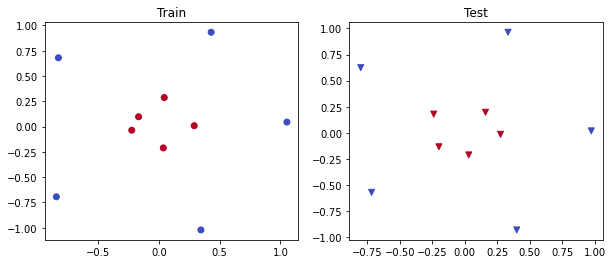

In [3]:
# Generate data set
X_train, y_train = make_circles(10, noise=0.05, factor=0.2)
X_test, y_test = make_circles(10, noise=0.05, factor=0.2)

# Visualize respectively the training and testing set
fig, ax = plt.subplots(1, 2, figsize=[10, 4])
ax[0].scatter(X_train[:,0], X_train[:,1], 
              marker='o', c = matplotlib.cm.coolwarm(np.array(y_train, dtype=np.float32)))
ax[0].set_title('Train')
ax[1].set_title('Test')
ax[1].scatter(X_test[:,0], X_test[:,1], marker='v', c = matplotlib.cm.coolwarm(np.array(y_test, dtype=np.float32)))

print("Let's first see our training and testing set:")

In [4]:
# Initialize the progress bar
bar_format_string = '{l_bar}{bar}|[{elapsed}<{remaining}, ' '{rate_fmt}{postfix}]'
pbar = tqdm(total=100, bar_format=bar_format_string)
pbar.close()
clear_output()

Now, let's see how to implement a quantum kernel with Paddle Quantum:

In [5]:
# Global variable for manual updates of the progress bar
N = 1

# The QKE circuit simulated by paddle quantm
def q_kernel_estimator(x1, x2):
    
    # Transform data vectors into tensors
    x1 = paddle.to_tensor(x1)
    x2 = paddle.to_tensor(x2)
    
    # Create the circuit
    cir = UAnsatz(2)
    
    # Add the encoding circuit for the first data vector
    cir.iqp_encoding(x1, pattern=[[0, 1]])
    
    # Add inverse of the encoding circuit for the second data vector
    cir.iqp_encoding(x2, pattern=[[0, 1]], invert=True)
    
    # Run the circuit with state vector mode
    fin_state = cir.run_state_vector()
    
    # Update the progress bar
    global N
    pbar.update(100/N)
    
    # Return the probability of measuring 0...0 
    return (fin_state[0].conj() * fin_state[0]).real().numpy()[0]

# Define a kernel matrix function, for which the input should be two list of vectors
# This is needed to customize the SVM kernel
def q_kernel_matrix(X1, X2):
    return np.array([[q_kernel_estimator(x1, x2) for x2 in X2] for x1 in X1])

# Visualize the decision function, boundary, and margins of +- 0.2
def visualize_decision_bound(clf):
    
    # Create a 10x10 mesh in the data plan 
    x_min, x_max = X_train[:,0].min(), X_train[:,0].max()
    y_min, y_max = X_train[:,1].min(), X_train[:,1].max()
    XX, YY = np.meshgrid(np.linspace(-1.2, 1.2, 10), 
                         np.linspace(-1.2, 1.2, 10))
    
    # Calculate the decision function value on the 10x10 mesh
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])
    Z_qke = Z.reshape(XX.shape)
    
    # visualize the decision function and boundary
    clear_output()
    plt.contourf(XX, YY, Z_qke ,vmin=-1., vmax=1., levels=20,
                 cmap=matplotlib.cm.coolwarm, alpha=1)
    plt.scatter(X_train[:,0], X_train[:,1], 
                c = matplotlib.cm.coolwarm(np.array(y_train, dtype=np.float32)),
               edgecolor='black')
    plt.scatter(X_test[:,0], X_test[:,1], marker='v', 
                c = matplotlib.cm.coolwarm(np.array(y_test, dtype=np.float32)),
               edgecolor='black')
    plt.contour(XX, YY, Z_qke, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],
                levels=[-.2, 0, .2])

# To make sure we didn't make any mistake, check if the kernel function satisfies K(x, x)=1
print('Check if K(x, x) = 1?',
      bool(abs(q_kernel_estimator(np.array([1. ,1.]), np.array([1., 1.])) - 1) < 1e-8))

Check if K(x, x) = 1? True


Then, let's try to use a support vector machine with a quantum kernel (QKE-SVM) to classify our data:

Let's see how the QKE-SVM performs on the training on both the training and testing data:


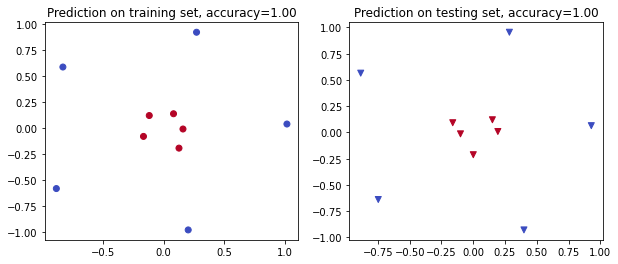

In [6]:
# Create the progress bar and the total kernel evaluation number N needed for training and prediction
pbar = tqdm(total=100, 
            desc='Training and predicting with QKE-SVM', 
            bar_format=bar_format_string)
N = len(X_train) ** 2 + len(X_train) ** 2 + len(X_train) * len(X_test)

# Create a support vector machine with a quantum kernel
svm_qke = svm.SVC(kernel=q_kernel_matrix)

# Train the svm with training data
svm_qke.fit(X_train, y_train)

# See how the svm classifies the training and testing data
predict_svm_qke_train = svm_qke.predict(X_train)
predict_svm_qke_test = svm_qke.predict(X_test)

# Calculate the accuracy
accuracy_train = np.array(predict_svm_qke_train == y_train, dtype=int).sum()/len(y_train)
accuracy_test = np.array(predict_svm_qke_test == y_test, dtype=int).sum()/len(y_test)

# Visualize the result
pbar.close()
clear_output()
fig, ax = plt.subplots(1, 2, figsize=[10, 4])
ax[0].scatter(X_train[:,0], X_train[:,1], marker='o', 
              c = matplotlib.cm.coolwarm(np.array(predict_svm_qke_train, dtype=np.float32)))
ax[0].set_title('Prediction on training set, accuracy={:.2f}'.format(accuracy_train))
ax[1].scatter(X_test[:,0], X_test[:,1], marker='v', 
              c = matplotlib.cm.coolwarm(np.array(predict_svm_qke_test, dtype=np.float32)))
ax[1].set_title('Prediction on testing set, accuracy={:.2f}'.format(accuracy_test))
print("Let's see how the QKE-SVM performs on the training on both the training and testing data:")

We can also visualize the decision function, also the decision boundary with margins of $\pm 0.2$:

Calculating the decision function of QKE-SVM: 100%|██████████████████████████████████████████▉|[01:24<00:00,  1.18it/s]


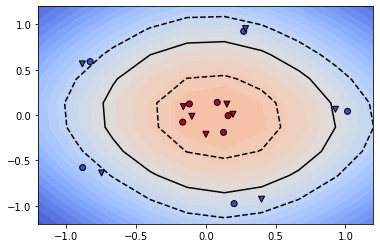

In [7]:
# Create the progress bar and the total kernel evaluation number N needed for visualizing the decision function
pbar = tqdm(total=100, 
            desc='Calculating the decision function of QKE-SVM', 
            bar_format=bar_format_string)
N = 10 ** 2 * len(X_train)
    
# Visualize the decision function
visualize_decision_bound(svm_qke)
pbar.close()

We can see that the quantum kernel has the ability to learn non-linearity correctly. As a matter of fact, the performance of quantum kernel methods in classification depends on whether the quantum feature map can distinguish non-trivial patterns hidden in the data. Currently, people are still exploring how to design a good quantum kernel: First, we may try different designs of encoding circuits; Second, we can train the quantum feature map to improve its classification accuracy [5-6]; Finally, we can also try variants of the quantum kernels [7]. 

In the following part, we will introduce another special kind of quantum kernel - projected quantum kernel. 

### Projected quantum kernel

It was mentioned above that quantum kernel methods can potentially distinguish intractable patterns by mapping classical data vectors into a quantum feature space via a quantum feature map. However, as the quantum feature space - the Hilbert space's dimensionality grows exponentially with the number of qubits, nearly all quantum states will be perpendicular to each other when we have a large number of qubits. Then the kernel matrix will just become an identity matrix $K_{ij} = K(\mathbf{x}_j, \mathbf{x}_i) \sim {I}$, and the kernel methods would fail. To avoid this problem caused by extra dimensionality, we first need to extract features from the Hilbert space and then construct the kernel function with these extracted features. Following this idea, a variant of quantum kernel - projected quantum kernel is proposed : By projecting the quantum feature vectors back into the classical space with a set of measurements, the dimensionality problem is mitigated [7]. Also, as the projection can preserve important features of the quantum feature space, the projected kernel can still gain a quantum advantage. 

There are several kinds of projected quantum kernels, here we choose the most rudimentary one:

$$
K^{P}(x_i,x_j) = \exp\left(-\gamma\sum\limits_{k}\sum\limits_{P\in \mathcal{M}}( {\rm Tr} (P\rho(x_i)_k)-{\rm Tr}(P\rho(x_j)_k))^{2}\right),
\tag{13}
$$

where $\rho(x_i)_k$ is the reduce density matrix of qubits $k$, $\mathcal{M}$ a set of measurements on the reduce density matrix. Here we take $k = 0, 1$ and $M = \{X, Y, Z \}$, which means using Pauli measurements to measure every single qubit at the output.

Let's first try to implement a projected quantum kernel circuit with Paddle Quantum:

In [8]:
# First we can create a circuit to calculate the feature map 
def projected_q_feature_map(x):
    cir = UAnsatz(2)

    # turn data into tensor
    x = paddle.to_tensor(x)
    
    # encode the classical data into a quantum state
    cir.iqp_encoding(x, pattern=[[0, 1]])
    
    # run the circuit with state vector mode
    cir.run_state_vector()
    
    # Update the progress bar
    global N
    pbar.update(100/N)
    
    # to measure the final state with Pauli measurement on every single qubit
    return [cir.expecval([[1.0, op_pauli]]).numpy()[0] 
            for op_pauli in ['z0', 'z1', 'x0', 'x1', 'y0', 'y1']]

# to compute the projected quantum kernel based on the feature vectors
def p_quantum_kernel_estimator(x1, x2):
    
    # compute the feature vector of each data and return the kernel function value
    p_feature_vector_1 = np.array(projected_q_feature_map(x1))
    p_feature_vector_2 = np.array(projected_q_feature_map(x2))
    
    return np.exp(-((p_feature_vector_1 - p_feature_vector_2) ** 2).sum())

# similarly, define the kernel matrix as required 
def p_quantum_kernel_matrix(X1, X2):
    return np.array([[p_quantum_kernel_estimator(x1, x2) for x2 in X2] for x1 in X1])

Then, we replace the quantum kernel in the support vector machine with a projected quantum kernel, and see how the projected kernel performs on this classification task:

Let's see how the PQK-SVM performs on the training on both the training and testing data:


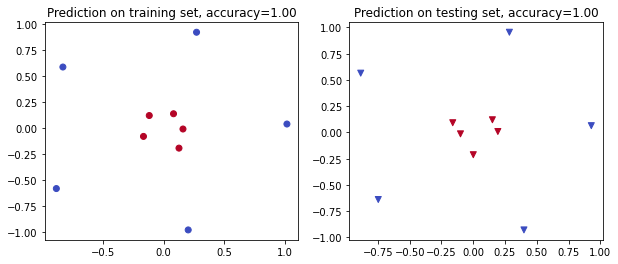

In [9]:
# Set the progress bar and the total kernel evaluation number N needed for training and prediction
pbar = tqdm(total=100, 
            desc='Training and predicting with PQK-SVM', 
            bar_format=bar_format_string)
N = 2 * (len(X_train) ** 2 + len(X_train) ** 2 + len(X_train) * len(X_test))

# Create a support vector machine with a quantum kernel
svm_pqk = svm.SVC(kernel=p_quantum_kernel_matrix)

# Train the svm with training data
svm_pqk.fit(X_train, y_train)

# See how the svm classifies the training and testing data
predict_svm_pqk_train = svm_pqk.predict(X_train)
predict_svm_pqk_test = svm_pqk.predict(X_test)

# Calculate the accuracy
accuracy_train = np.array(predict_svm_pqk_train == y_train, dtype=int).sum()/len(y_train)
accuracy_test = np.array(predict_svm_pqk_test == y_test, dtype=int).sum()/len(y_test)

# Visualize the result
pbar.close()
clear_output()
fig, ax = plt.subplots(1, 2, figsize=[10, 4])
ax[0].scatter(X_train[:,0], X_train[:,1], marker='o', 
              c = matplotlib.cm.coolwarm(np.array(predict_svm_pqk_train, dtype=np.float32)))
ax[0].set_title('Prediction on training set, accuracy={:.2f}'.format(accuracy_train))
ax[1].scatter(X_test[:,0], X_test[:,1], marker='v', 
              c = matplotlib.cm.coolwarm(np.array(predict_svm_pqk_test, dtype=np.float32)))
ax[1].set_title('Prediction on testing set, accuracy={:.2f}'.format(accuracy_test))
print("Let's see how the PQK-SVM performs on the training on both the training and testing data:")

Let's also check the decision function given by the PQK-SVM:

Calculating the decision function for PQK-SVM: 100%|█████████████████████████████████████████▉|[02:37<00:00,  1.58s/it]


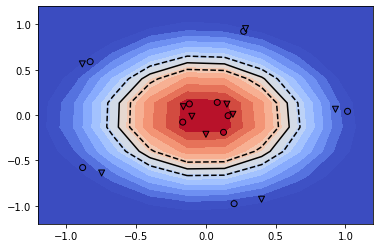

In [10]:
# Set the progress bar and the total kernel evaluation number N needed for visualizing the decision function
pbar = tqdm(total=100, 
            desc='Calculating the decision function for PQK-SVM', 
            bar_format=bar_format_string)
N = 2 * 10 ** 2 * len(X_train)
    
# Clear the progress bar and visualize the decision function
visualize_decision_bound(svm_pqk)
pbar.close()

## Conclusion

In quantum machine learning, people hope the design learning models which can gain quantum advantage by exploring the nature of quantum mechanics' laws. Recently, many connections are made  between these quantum models and kernel methods, one of the most important classical machine learning approaches. In comparison to considering a parameterized quantum circuit as a "quantum neural network", where we focus on the variational ansatz $U(\theta)$, the quantum kernel methods emphasize the importance of quantum feature map $U(x)$, which describes how the classical data vectors is mapped to the quantum states. This brings new perspectives to how we can design novel quantum machine learning algorithms. Therefore, we encourage readers to together explore the performance of various quantum kernel designs on different data sets.


---

## References

[1] Schuld, Maria. "Supervised quantum machine learning models are kernel methods." arXiv preprint [arXiv:2101.11020 (2021)](https://arxiv.org/abs/2101.11020).

[2] Havlíček, Vojtěch, et al. "Supervised learning with quantum-enhanced feature spaces." [Nature 567.7747 (2019): 209-212](https://arxiv.org/abs/1804.11326).

[3] Liu, Yunchao, Srinivasan Arunachalam, and Kristan Temme. "A rigorous and robust quantum speed-up in supervised machine learning." arXiv preprint [arXiv:2010.02174 (2020)](https://arxiv.org/abs/2010.02174).

[4] Schuld, Maria, and Nathan Killoran. "Quantum machine learning in feature Hilbert spaces." [Phys. Rev. Lett. 122.4 (2019): 040504](https://arxiv.org/abs/1803.07128).

[5] Hubregtsen, Thomas, et al. "Training Quantum Embedding Kernels on Near-Term Quantum Computers." arXiv preprint [arXiv:2105.02276(2021)](https://arxiv.org/abs/2105.02276).

[6] Glick, Jennifer R., et al. "Covariant quantum kernels for data with group structure." arXiv preprint [arXiv:2105.03406(2021)](https://arxiv.org/abs/2105.03406).

[7] Huang, Hsin-Yuan, et al. "Power of data in quantum machine learning." arXiv preprint [arXiv:2011.01938 (2020)](https://arxiv.org/abs/2011.01938).

[8] Schölkopf, Bernhard, and Alexander J. Smola"Learning with kernels: support vector machines, regularization, optimization, and beyond." [MIT Press(2002)](https://mitpress.mit.edu/books/learning-kernels).